# Bloch-Torrey Equation

## Introduction

Here we solve the Bloch-Torrey equation on a unit square, with the diffusion coefficient (or tensor) $D(x)$, relaxation rates $R_1(x)$ and $R_2(x)$, and resonance frequency $\omega(x)$ all given as a generic functions.
The strong form of the Bloch-Torrey equation is given by

\begin{align}
\begin{cases}
    \frac{\partial M_x}{\partial t} &= \nabla \cdot (D \cdot \nabla M_x) - R_2 \, M_x + \omega \, M_y\\
    \frac{\partial M_y}{\partial t} &= \nabla \cdot (D \cdot \nabla M_y) - R_2 \, M_y - \omega \, M_x\\
    \frac{\partial M_z}{\partial t} &= \nabla \cdot (D \cdot \nabla M_z) - R_1 \, (M_z - M_{z,\infty}),
\end{cases}\label{eq:strong_mag}\tag{1a}
\end{align}

where $\vec{M}(x,t) = [M_x(x,t), \, M_y(x,t), \, M_z(x,t)]$ is the magnetization vector.
Equation (\ref{eq:strong_mag}) holds for all points $x$ in the domain $\Omega$.
The operation $a \cdot b$ is a tensor contraction of the tensors $a$ and $b$, reducing to elementwise multiplication when one or both of $a$ or $b$ is scalar.

Letting $\vec{u}(x,t) = [M_x(x,t), \, M_y(x,t), \, M_{z,\infty} - M_z(x,t)]$, equation (\ref{eq:strong_mag}) becomes

\begin{align}
\begin{cases}
    \frac{\partial u_x}{\partial t} &= \nabla \cdot (D \cdot \nabla u_x) - R_2 \, u_x + \omega \, u_y\\
    \frac{\partial u_y}{\partial t} &= \nabla \cdot (D \cdot \nabla u_y) - R_2 \, u_y - \omega \, u_x\\
    \frac{\partial u_z}{\partial t} &= \nabla \cdot (D \cdot \nabla u_z) - R_1 \, u_z,
\end{cases}\label{eq:strong}\tag{1b}
\end{align}

Lastly, the first two PDEs describing the transverse equations in (\ref{eq:strong_mag}) can be rewritten in terms of the complex magnetization $m = u_x + i u_y$ and the complex decay rate $\Gamma = R_2 + i \omega$ as

\begin{align}
    \frac{\partial m}{\partial t} &= \nabla \cdot (D \cdot \nabla m) - \Gamma \, m.
    \label{eq:strong_cplx}\tag{1c}
\end{align}

Often, we may neglect $u_z$ entirely and solve the simpler equation (\ref{eq:strong_cplx}) alone.
For example, when perfect flip angles of 180 degrees are used along the x- or y-axes, or any other refocusing pulse which does not transfer any magnetization $M_z$ into the transverse components $M_x$ and $M_y$, or vice-versa.
Here, however, we will continue to treat the general case (\ref{eq:strong}).

We consider homogeneous Neumann boundary conditions such that

\begin{align}
    D \, \nabla \vec{u}(x) \cdot \hat{n} &= \vec{0}  \quad \forall x \in \partial \Omega\label{eq:bc}\tag{2}\\
\end{align}

where $\partial \Omega$ denotes the boundary of $\Omega$. The initial condition is assumed to be specified,

\begin{equation}
    \vec{u}(x,t=0) = \vec{u}_0 (x)  \quad \forall x \in \Omega.\label{eq:ic}\tag{3}
\end{equation}

The weak form corresponding to equation \ref{eq:strong} is given by

\begin{align}
    \int_{\Omega} \vec{v} \cdot \vec{u}_t \, d\Omega
    &= -\int_{\Omega}
    -\vec{v} \cdot \nabla \cdot ( D \, \nabla \vec{u} ) +
    \vec{v} \cdot (\vec{R} \odot \vec{u}) -
    \omega \, \vec{v}_\perp \times \vec{u}_\perp
    \, d\Omega \\
    &= -\int_{\Omega}
    \nabla \vec{v} : D \, \nabla \vec{u} +
    \vec{v} \cdot (\vec{R} \odot \vec{u}) -
    \omega \, \vec{v}_\perp \times \vec{u}_\perp
    \, d\Omega + 
    \int_{\partial\Omega} \vec{v} \cdot (D \, \nabla\vec{u} \cdot \hat{n}) \, d\Gamma,
\end{align}

where $\vec{v}$ is a suitable test function, $\vec{R} = [R_2, R_2, R_1]$, $\odot$ is the Hadamard (elementwise) product, and $\vec{u}_\perp$ is the transverse component $[u_x, u_y]$ of $\vec{u}$.

Applying the homogeneous Neumann boundary conditions from equation (\ref{eq:bc}), the final weak form becomes
\begin{align}
    \int_{\Omega} \vec{v} \cdot \vec{u}_t \, d\Omega
    = -\int_{\Omega}
    \nabla \vec{v} : D \, \nabla \vec{u} +
    \vec{v} \cdot (\vec{R} \odot \vec{u}) -
    \omega \, \vec{v}_\perp \times \vec{u}_\perp
    \, d\Omega.\label{eq:weak}\tag{4}
\end{align}

Note: in two dimensions, the cross product is simply a scalar. However, `Tensors.jl` defines the two dimensional cross product by first extending the 2D vectors into 3D. Below, we use the symbol $\boxtimes$ to denote the scalar version, which is the same as taking the third component of the vector version

In [1]:
# Activate project
import Pkg
Pkg.activate(joinpath(@__DIR__, ".."))
Pkg.instantiate()
include(joinpath(@__DIR__, "../initpaths.jl"))

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In [2]:
using StatsPlots, BSON, Dates
pyplot(size=(1200,900)); # NOTE: must load pyplot backend BEFORE loading MATLAB in MWFUtils

┌ Info: Recompiling stale cache file /home/jdoucette/.julia/compiled/v1.1/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/jdoucette/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


In [3]:
using MWFUtils
# mxcall(:cd, 0, @__DIR__) # change MATLAB path to current path for saving outputs
# mxcall(:figure, 0) # bring up MATLAB figure gui

┌ Info: Recompiling stale cache file /home/jdoucette/.julia/compiled/v1.1/MWFUtils.ji for MWFUtils [top-level]
└ @ Base loading.jl:1184


**Set parameters**

In [64]:
params = Dict{Symbol,Float64}(
    :g_ratio => 0.8, # [μm/μm]
    :B0 => 0.0, # [Tesla]
    :theta => 0.0, # [radians]
    :D_Tissue => 100.0, # [μm²/s]
    :D_Sheath => 100.0, # [μm²/s]
    :D_Axon => 100.0, # [μm²/s]
    :K_perm => 0.01, # [μm/s]
    :FRD_Sheath => 0.5, # [unitless: μm²/s per μm²/s]
);
btparams = BlochTorreyParameters(params);

**Create Geometry**

In [5]:
geom = creategeometry(SingleFibre(), btparams);

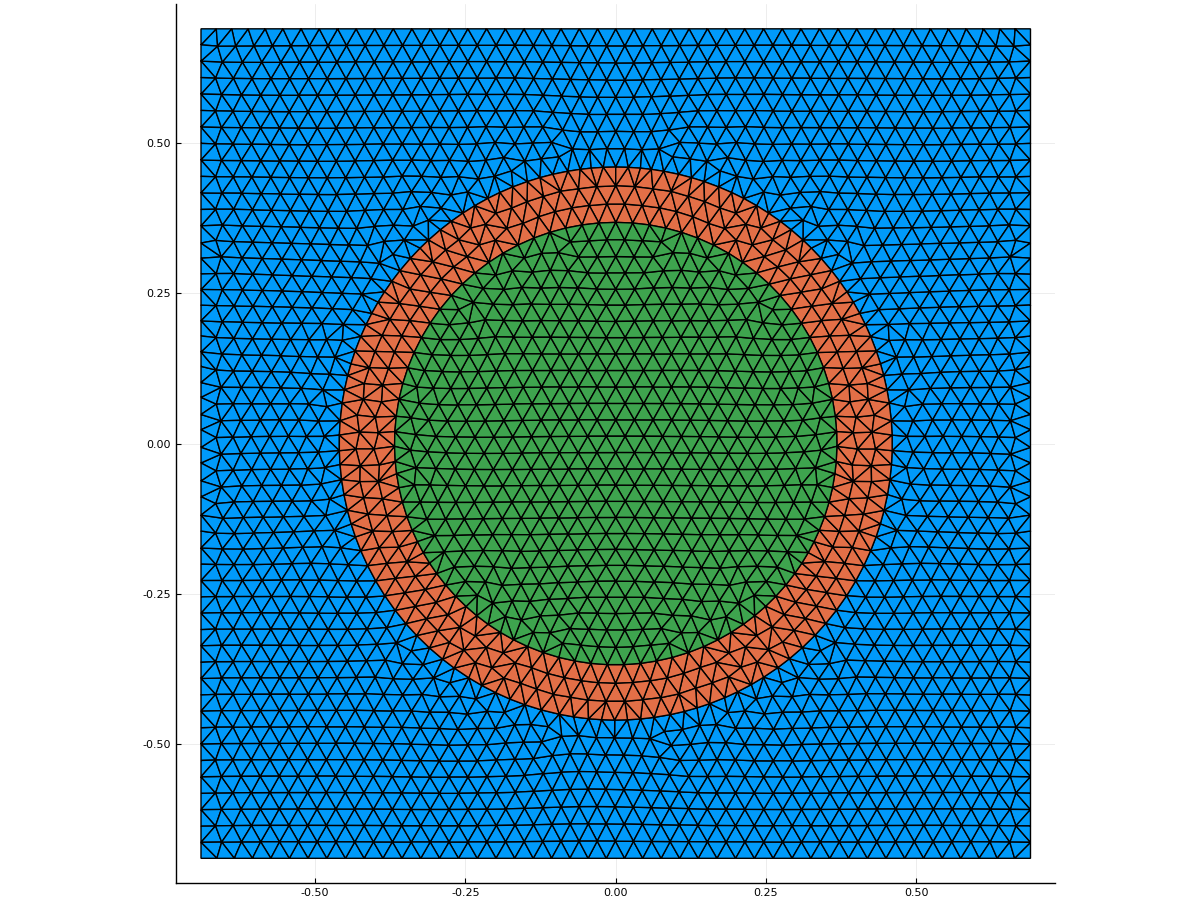

In [6]:
p = plot(; labels = :none);
simpplot!(p, geom.exteriorgrids);
simpplot!(p, geom.torigrids);
simpplot!(p, geom.interiorgrids);
p

In [7]:
@unpack exteriorgrids, torigrids, interiorgrids, outercircles, innercircles, bdry = geom;
ferritins = Vec{3,floattype(bdry)}[];

**Create domains**

In [8]:
# uType = ComplexF64; u0 = -1.0im;
# uType = Vec{2,Float64}; u0 = Vec{2}((0.0, -1.0));
uType = Vec{3,Float64}; u0 = Vec{3}((0.0, 0.0, 1.0));

In [9]:
# if true
#     R, dR = btparams.R_mu, (1 - btparams.g_ratio) * btparams.R_mu / 2
#     μ, σ = R - dR, 2*dR
#     x0 = Vec2d((0,1))
#     x0 = μ * x0 / norm(x0)
#     if uType <: Vec{2}
#         u0 = x -> uType((0.0, max(1e-14, exp(-norm2(x - x0) / 2σ^2))))
#     elseif uType <: Vec{3}
#         u0 = x -> uType((0.0, 0.0, max(1e-14, exp(-norm2(x - x0) / 2σ^2))))
#     else
#         u0 = x -> uType(0.0, max(1e-14, exp(-norm2(x - x0) / 2σ^2)))
#     end
# end

In [65]:
myelinprob = MyelinProblem(btparams);

In [66]:
myelinsubdomains = createmyelindomains(
    vec(exteriorgrids), vec(torigrids), vec(interiorgrids),
    vec(outercircles), vec(innercircles), vec(ferritins),
    uType);

In [67]:
@unpack myelinprob, myelinsubdomains, myelindomains = createdomains(btparams,
    exteriorgrids, torigrids, interiorgrids,
    outercircles, innercircles, ferritins, uType);

    Assemble subdomains    

┌ Info: Assembling MyelinDomain from subdomains
└ @ MWFUtils /home/jdoucette/Documents/code/BlochTorreyExperiments-master/MyelinWaterTools/MWFUtils/src/mwfutils.jl:392


 0.028481 seconds (679.89 k allocations: 11.753 MiB)
    Factorize subdomains    0.122350 seconds (123 allocations: 15.119 MiB, 3.98% gc time)
    Assemble combined       0.086556 seconds (35.45 k allocations: 62.455 MiB, 11.82% gc time)
    Factorize combined      0.081658 seconds (46 allocations: 15.399 MiB)


**Solve Bloch-Torrey equation**

In [68]:
# while isempty(Revise.revision_queue); sleep(0.1); end; @show Revise.revision_queue;

In [69]:
# allsols = Dict();

In [84]:
# Solve Bloch-Torrey equation
BlochTorreyUtils._reset_all_counters!()
solvetime = @elapsed begin
    sols = solveblochtorrey(myelinprob, myelindomains;
        u0 = u0, uType = uType, flipangle = π,
        TE = 10e-3, TR = 50e-3, nTE = 4, nTR = 1);
end
BlochTorreyUtils._display_counters()

┌ Info: Solving MyelinProblem
└ @ MWFUtils /home/jdoucette/Documents/code/BlochTorreyExperiments-master/MyelinWaterTools/MWFUtils/src/mwfutils.jl:552


 180.0 degree pulse of type xyx applied at t = 5.0 ms
 180.0 degree pulse of type xyx applied at t = 15.0 ms
 180.0 degree pulse of type xyx applied at t = 25.0 ms
 180.0 degree pulse of type xyx applied at t = 35.0 ms
 89.783675 seconds (1.72 M allocations: 6.226 GiB, 2.49% gc time)

FORWARD_EVAL_COUNTER[] = 25843
ADJOINT_EVAL_COUNTER[] = 0
TRANSPOSE_EVAL_COUNTER[] = 3



In [85]:
allsols[:vec3_unscaled] = (uType = typeof(u0), solvetime = solvetime, sols = deepcopy(sols));

**Scale and re-solve Bloch-Torrey equation**

In [76]:
scaled_myelindomains = (m -> (K = getstiffness(m); K .*= 10e-3; m)).(deepcopy(myelindomains));

In [81]:
# Solve Bloch-Torrey equation
BlochTorreyUtils._reset_all_counters!()
solvetime = @elapsed begin
    scaled_sols = solveblochtorrey(myelinprob, scaled_myelindomains;
        u0 = u0, uType = uType, flipangle = π,
        TE = 1.0, TR = 5.0, nTE = 4, nTR = 1);
end
BlochTorreyUtils._display_counters()

┌ Info: Solving MyelinProblem
└ @ MWFUtils /home/jdoucette/Documents/code/BlochTorreyExperiments-master/MyelinWaterTools/MWFUtils/src/mwfutils.jl:552


 180.0 degree pulse of type xyx applied at t = 500.0 ms
 180.0 degree pulse of type xyx applied at t = 1500.0 ms
 180.0 degree pulse of type xyx applied at t = 2500.0 ms
 180.0 degree pulse of type xyx applied at t = 3500.0 ms
 64.807494 seconds (1.34 M allocations: 4.807 GiB, 2.76% gc time)

FORWARD_EVAL_COUNTER[] = 19860
ADJOINT_EVAL_COUNTER[] = 0
TRANSPOSE_EVAL_COUNTER[] = 3



In [82]:
allsols[:vec3_scaled] = (uType = typeof(u0), solvetime = solvetime, sols = deepcopy(scaled_sols));

In [83]:
allsols[:vec3_scaled].sols[1].u[end] ≈ allsols[:vec3_unscaled].sols[1].u[end]

true

In [885]:
mkpath("tmp")
saveblochtorrey(myelindomains, sols;
    timepoints = cpmg_savetimes(0.25e-3, 10e-3, 50e-3, 4, 1),
    filename = "tmp/" * DrWatson.savename(params))

In [886]:
# allsols = Dict();
# allsols[:vec2_iso] = (uType = typeof(u0), sols = deepcopy(sols));
# allsols[:vec3_iso] = (uType = typeof(u0), sols = deepcopy(sols));
# allsols[:cplx_iso] = (uType = typeof(u0), sols = deepcopy(sols));
# allsols[:cplx_iso_tens] = (uType = typeof(u0), sols = deepcopy(sols));
# allsols[:cplx_rot_iso_tens] = (uType = typeof(u0), sols = deepcopy(sols));

In [887]:
# totrans(uType, sols) = reduce(vcat, transverse.(reinterpret(uType, u)) for u in sols[1].u)
# for (i,k1) in enumerate(keys(allsols)), (j,k2) in enumerate(keys(allsols))
#     i >= j && continue
#     v1, v2 = allsols[k1], allsols[k2]
#     pass = totrans(v1.uType, v1.sols) ≈ totrans(v2.uType, v2.sols)
#     @show pass, i, j, k1, k2
# end

In [888]:
# while isempty(Revise.revision_queue); sleep(0.1); end; revise()

# Minimum working example

In [ ]:
include("initpaths.jl")
using MWFUtils
btparams = BlochTorreyParameters{Float64}(D_Tissue = 10.0, D_Sheath = 10.0, D_Axon = 10.0, K_perm = 0.1);
geom = creategeometry(SingleFibre(), btparams);
@unpack exteriorgrids, torigrids, interiorgrids, outercircles, innercircles, bdry = geom;
ferritins = Vec{3,floattype(bdry)}[];
uType = ComplexF64;
u0 = -1.0im;
myelinprob = MyelinProblem(btparams);
myelinsubdomains = createmyelindomains(vec(exteriorgrids), vec(torigrids), vec(interiorgrids), vec(outercircles), vec(innercircles), vec(ferritins), uType);
@unpack myelinprob, myelinsubdomains, myelindomains = createdomains(btparams, exteriorgrids, torigrids, interiorgrids, outercircles, innercircles, ferritins, uType);
sols = solveblochtorrey(myelinprob, myelindomains; u0 = u0, uType = uType, flipangle = π, TE = 5e-3, TR = 50e-3, nTE = 4, nTR = 1);

# Testing

In [889]:
# @show Revise.revision_queue; revise()

In [890]:
# # uType = ComplexF64; u0 = 1.0 + 1.0im
# # uType = Vec2d; u0 = ones(uType)
# uType = Vec3d; u0 = ones(uType)
# grid = generate_grid(Triangle, (3,3));
# domain = ParabolicDomain(grid, uType);
# u = interpolate(x->u0, domain);
# S = integrate(u, domain)

In [891]:
# doassemble!(myelinsubdomains[1], myelinprob);
# M = getmass(myelinsubdomains[1]);
# @show M[1:3:end, 1:3:end] |> isposdef;
# @show M[2:3:end, 2:3:end] |> isposdef;
# @show M[3:3:end, 3:3:end] |> isposdef;
# @show M[1:3:end, 1:3:end] ≈ M[2:3:end, 2:3:end];
# @show M[1:3:end, 1:3:end] ≈ M[3:3:end, 3:3:end];
# @show maximum(abs, M[1:3:end, 2:3:end]) ≈ 0;
# @show maximum(abs, M[1:3:end, 3:3:end]) ≈ 0;
# @show maximum(abs, M[2:3:end, 1:3:end]) ≈ 0;
# @show maximum(abs, M[2:3:end, 3:3:end]) ≈ 0;
# @show maximum(abs, M[3:3:end, 1:3:end]) ≈ 0;
# @show maximum(abs, M[3:3:end, 2:3:end]) ≈ 0;